# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

import warnings

warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
# Load data
##### Load train and Test set

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data = train.copy()
test_data  = test.copy()

# combine train and test for featuering both at the same time 
df = pd.concat([train_data, test_data], ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Cleaning

In [8]:
#checking null values
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
# checking duplicate values
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df_numerical_features = df.select_dtypes(exclude='object')
df_categorical_features = df.select_dtypes(include='object')

In [14]:
df_numerical_features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [15]:
df_numerical_features.drop(['PassengerId', 'Survived'], axis=1, inplace=True)

In [16]:
df_numerical_features

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
1304,3,NaN,0,0,8.0500
1305,1,39.0,0,0,108.9000
1306,3,38.5,0,0,7.2500
1307,3,NaN,0,0,8.0500


In [17]:
df_categorical_features

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
1307,"Ware, Mr. Frederick",male,359309,NaN,S


In [18]:
# Get a list of numerical column names (int64 and float64 types)
numerical_columns = df_numerical_features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical column names
print(numerical_columns)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Visualizing 

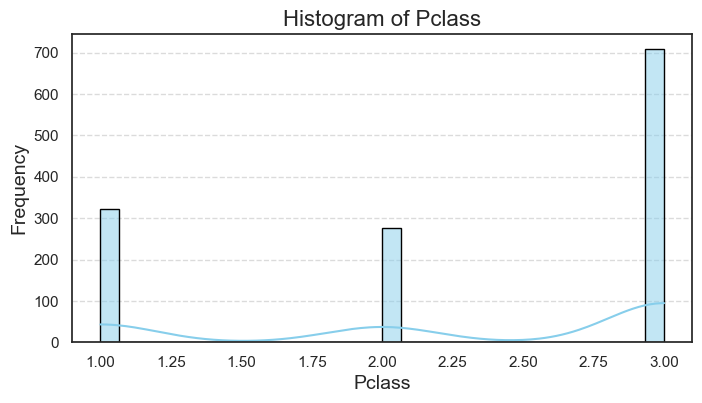

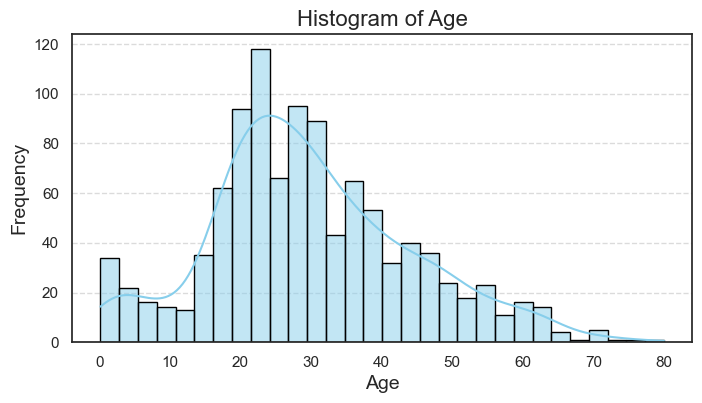

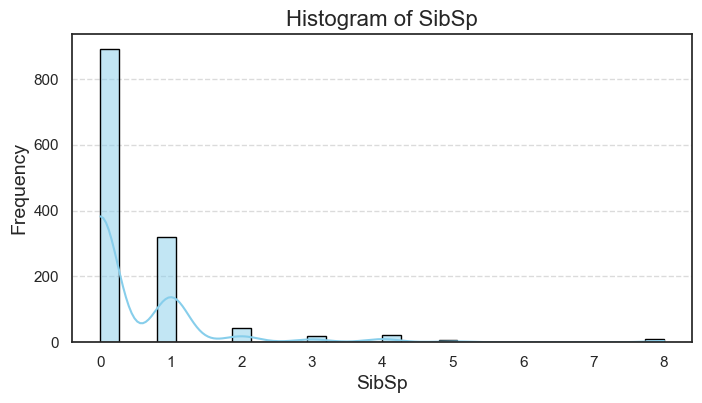

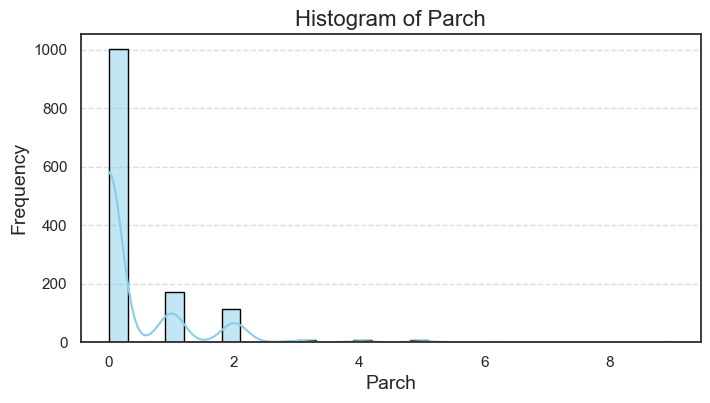

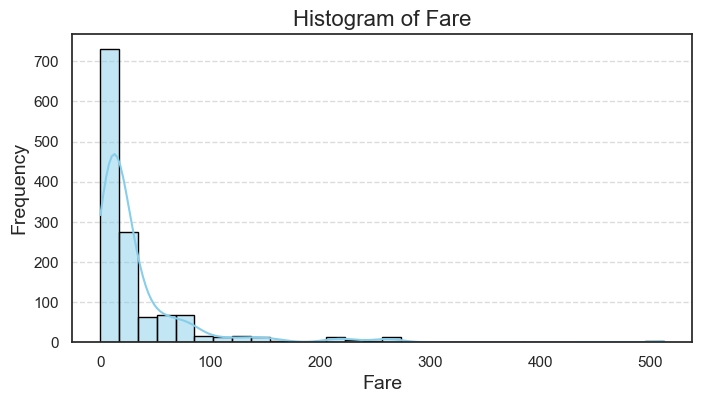

In [20]:
def plot_histogram(data, column):
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for column in numerical_columns:
    plot_histogram(df, column)

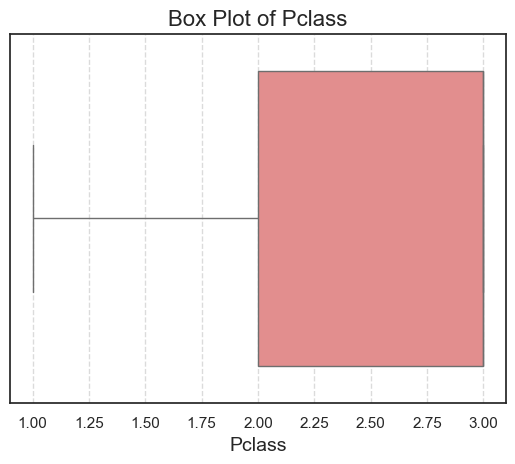

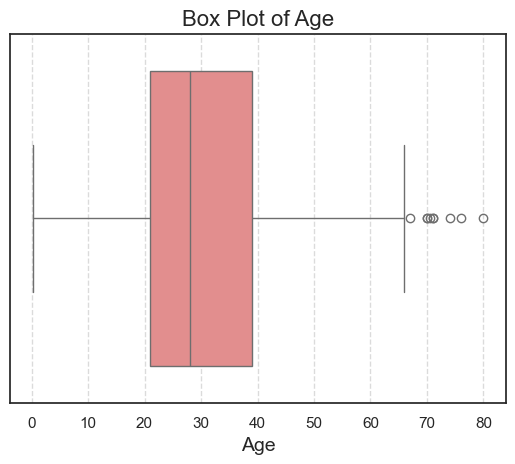

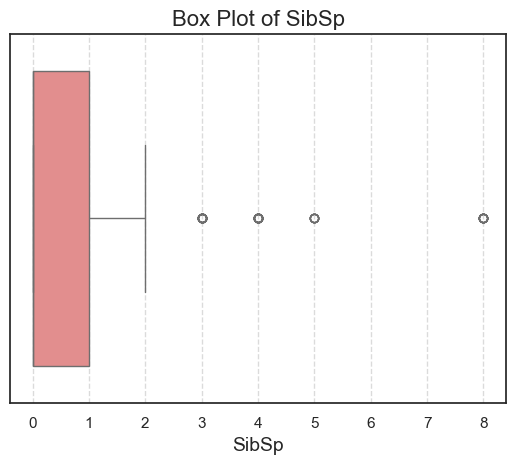

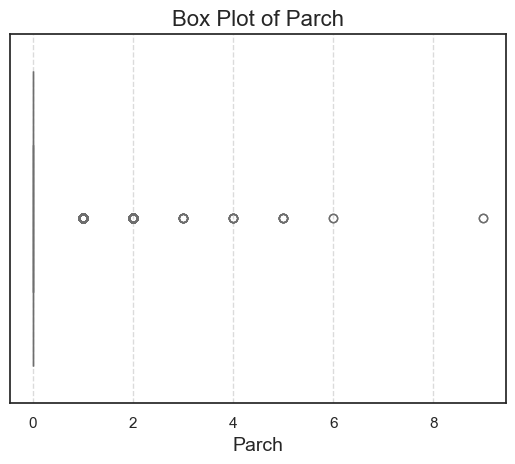

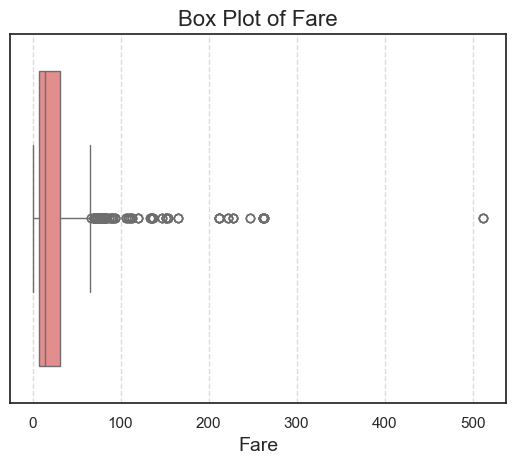

In [21]:
def plot_boxplot(data, column):
    # plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Box Plot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Box plot for each numerical column
for column in numerical_columns:
    plot_boxplot(df, column)

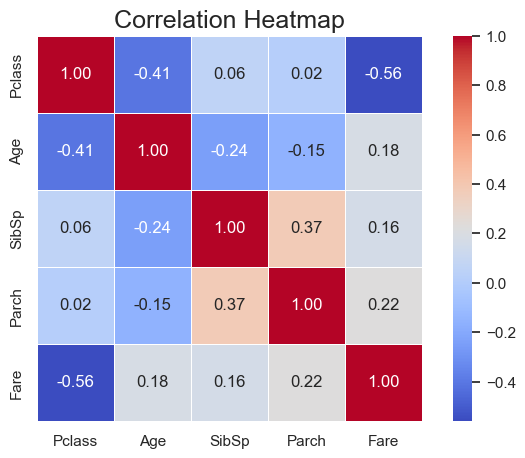

In [22]:
def plot_correlation_heatmap(data):
    plt.figure(figsize=(8, 5))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=18)
    plt.show()

# Call the function to plot
plot_correlation_heatmap(df_numerical_features)

In [23]:
# check outliers 

# Calculate Q1, Q3, and IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame to identify outliers
outlier_condition = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Count the number of outliers in each observation (row)
outlier_counts = outlier_condition.sum(axis=1)

# Select observations with more than 2 outliers
observations_with_many_outliers = df[outlier_counts > 2]

# Show selected observations
observations_with_many_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [24]:
# # Drop outliers
# cleaned_df = df.drop(observations_with_many_outliers.index, axis = 0).reset_index(drop=True)

# Featuring Data

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
cleaned_df = df.copy()

cleaned_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [28]:
# Fill missing numerical values with mean or median
cleaned_df['Age'].fillna(cleaned_df['Age'].mean(), inplace=True)

cleaned_df['Fare'].fillna(cleaned_df['Fare'].mean(), inplace=True)

# Replacing missing values in the 'Embarked' column with the most frequent value (Mode Imputation)
mode_embarked = cleaned_df['Embarked'].mode()[0]
cleaned_df['Embarked'].fillna(mode_embarked, inplace=True)

In [29]:
cleaned_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [30]:
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


## Pclass

In [32]:
cleaned_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Sex

In [34]:
cleaned_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## SibSp and Parch

In [36]:
# Calculate FamilySize by adding the number of siblings/spouses (SibSp), 
# parents/children (Parch), and 1 (to account for the individual themselves)
cleaned_df['FamilySize'] = cleaned_df['SibSp'] + cleaned_df['Parch'] + 1

In [66]:
cleaned_df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [68]:
# Initialize IsAlone as 0, indicating the passenger is not alone by default
cleaned_df['IsAlone'] = 0

# Update IsAlone to 1 for passengers with a FamilySize of 1, indicating they are traveling alone
cleaned_df.loc[cleaned_df['FamilySize'] == 1, 'IsAlone'] = 1

# Calculate the average survival rate grouped by the IsAlone feature
cleaned_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


## Embarked

In [40]:
cleaned_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Fare

In [42]:
cleaned_df[['Fare']].describe()

,Fare
count,1309.000000
mean,33.295479
std,51.738879
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [70]:
# Divide the Fare feature into 4 equal-sized categories based on its distribution
cleaned_df['CategoricalFare'] = pd.qcut(cleaned_df['Fare'], 4)

In [72]:
cleaned_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.275]",0.441048
3,"(31.275, 512.329]",0.600000


## Age

In [46]:
cleaned_df[['Age']].describe()

,Age
count,1309.000000
mean,29.881138
std,12.883193
min,0.170000
25%,22.000000
50%,29.881138
75%,35.000000
max,80.000000


In [104]:
# Divide the Age feature into 5 equal-width categories to create age groups
cleaned_df['CategoricalAge'] = pd.cut(cleaned_df['Age'], 5)

# Calculate the average survival rate for each age category
cleaned_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Survived
0,"(-0.004, 0.8]",0.550000
1,"(0.8, 1.6]",0.344168
2,"(1.6, 2.4]",0.404255
3,"(2.4, 3.2]",0.434783
4,"(3.2, 4.0]",0.090909


## Name

In [74]:
# Extract titles from the "Name" column by splitting on commas and periods, then trimming any whitespace
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in cleaned_df["Name"]]

# Create a new column 'Title' in the dataset to store the extracted titles
cleaned_df["Title"] = pd.Series(dataset_title)

In [50]:
title =  cleaned_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
title.sort_values(by='Survived', ascending=False)

,Title,Survived
17,the Countess,1.000000
10,Mlle,1.000000
16,Sir,1.000000
14,Ms,1.000000
6,Lady,1.000000
11,Mme,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [76]:
# Replace uncommon titles with 'Rare' to reduce the number of unique values in the Title column
cleaned_df['Title'] = cleaned_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)

# Standardize similar titles by replacing 'Mlle' and 'Ms' with 'Miss', and 'Mme' with 'Mrs'
cleaned_df['Title'] = cleaned_df['Title'].replace('Mlle', 'Miss')
cleaned_df['Title'] = cleaned_df['Title'].replace('Ms', 'Miss')
cleaned_df['Title'] = cleaned_df['Title'].replace('Mme', 'Mrs')

In [78]:
cleaned_df['Title'].value_counts()

Title
Mr              757
Miss            264
Mrs             198
Master           61
Rare             28
the Countess      1
Name: count, dtype: int64

In [80]:
cleaned_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


This code extracts the last name from the Name column, initializes a Family survival feature, and updates it based on the survival status of family members. It groups the data by last name and fare, assigning survival values based on family members' outcomes. 

In [83]:
# Extract the last name from the 'Name' column by splitting on the comma
cleaned_df['Last name'] = cleaned_df['Name'].apply(lambda x: str.split(x, ",")[0])

# Fill missing values in the 'Fare' column with the mean fare
# cleaned_df['Fare'].fillna(cleaned_df['Fare'].mean(), inplace=True)

# Calculate family size (this line is commented out but can be used if needed)
# cleaned_df['FamilySize'] = cleaned_df['SibSp'] + cleaned_df['Parch'] + 1  # Include the passenger themselves

# Initialize the 'Family survival' feature with a default value of 0.5
cleaned_df['Family survival'] = 0.5

# Process family survival information by grouping by last name and fare
for grp, grp_df in cleaned_df.groupby(['Last name', 'Fare']):
    if len(grp_df) > 1:  # Only consider families with more than one member
        for PassID, row in grp_df.iterrows():
            # Check the survival status of family members
            smax = grp_df['Survived'].max()
            smin = grp_df['Survived'].min()

            # If any family member survived
            if smax == 1.0:
                cleaned_df.loc[PassID, 'Family survival'] = 1
            # If no family members survived
            elif smin == 0.0:
                cleaned_df.loc[PassID, 'Family survival'] = 0

# Display the first few rows of relevant columns to verify results
print(cleaned_df[['Last name', 'FamilySize', 'Survived', 'Family survival']].head())

   Last name  FamilySize  Survived  Family survival
0     Braund           2       0.0              0.5
1    Cumings           2       1.0              1.0
2  Heikkinen           1       1.0              0.5
3   Futrelle           2       1.0              1.0
4      Allen           1       0.0              0.5


## Cabin 

## Ticket

In [57]:
# ticket = cleaned_df['Ticket'].str[0]
# ticket.value_counts()

# cleaned_df["Ticket_Cleand"] = pd.Series(ticket)

# # List of valid titles to keep
# valid_ticket = ['3', '2', '1', 'P', 'S']

# # Use np.where to replace invalid titles with 'Other'
# cleaned_df['Ticket_Cleand'] = np.where(cleaned_df['Ticket_Cleand'].isin(valid_ticket), cleaned_df['Ticket_Cleand'], 'Other')

# # Display the count of each title in the DataFrame
# print(cleaned_df['Ticket_Cleand'].value_counts())

In [58]:
# cleaned_df[['Ticket_Cleand', 'Survived']].groupby(['Ticket_Cleand'], as_index=False).mean()

In [106]:
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,Title,Last name,Family survival,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,NaN,S,2,0,"(-0.001, 7.896]",Mr,Braund,0.5,"(0.8, 1.6]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C85,C,2,0,"(31.275, 512.329]",Mrs,Cumings,1.0,"(1.6, 2.4]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,"(7.896, 14.454]",Miss,Heikkinen,0.5,"(0.8, 1.6]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,C123,S,2,0,"(31.275, 512.329]",Mrs,Futrelle,1.0,"(1.6, 2.4]"
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Allen,0.5,"(1.6, 2.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,1.0,0,0,A.5. 3236,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Spector,0.5,"(0.8, 1.6]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,2.0,0,0,PC 17758,3,C105,C,1,1,"(31.275, 512.329]",Rare,Oliva y Ocana,0.5,"(1.6, 2.4]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,2.0,0,0,SOTON/O.Q. 3101262,0,NaN,S,1,1,"(-0.001, 7.896]",Mr,Saether,0.5,"(1.6, 2.4]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,1.0,0,0,359309,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Ware,0.5,"(0.8, 1.6]"


## Encoding 

In [88]:
# Mapping Fare
cleaned_df.loc[ cleaned_df['Fare'] <= 7.91, 'Fare'] 						        = 0
cleaned_df.loc[(cleaned_df['Fare'] > 7.91) & (cleaned_df['Fare'] <= 14.454), 'Fare'] = 1
cleaned_df.loc[(cleaned_df['Fare'] > 14.454) & (cleaned_df['Fare'] <= 31), 'Fare']   = 2
cleaned_df.loc[ cleaned_df['Fare'] > 31, 'Fare'] 							        = 3
cleaned_df['Fare'] = cleaned_df['Fare'].astype(int)



# Mapping Age
cleaned_df.loc[ cleaned_df['Age'] <= 16.336, 'Age'] 					       = 0
cleaned_df.loc[(cleaned_df['Age'] > 16.336) & (cleaned_df['Age'] <= 32.252), 'Age'] = 1
cleaned_df.loc[(cleaned_df['Age'] > 32.252) & (cleaned_df['Age'] <= 48.168), 'Age'] = 2
cleaned_df.loc[(cleaned_df['Age'] > 48.168) & (cleaned_df['Age'] <= 64.084), 'Age'] = 3
cleaned_df.loc[ cleaned_df['Age'] > 64.084, 'Age']                           = 4

In [90]:
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,Title,Last name,Family survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,NaN,S,2,0,"(-0.001, 7.896]",Mr,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C85,C,2,0,"(31.275, 512.329]",Mrs,Cumings,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,"(7.896, 14.454]",Miss,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,C123,S,2,0,"(31.275, 512.329]",Mrs,Futrelle,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Allen,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,1.0,0,0,A.5. 3236,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Spector,0.5
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,2.0,0,0,PC 17758,3,C105,C,1,1,"(31.275, 512.329]",Rare,Oliva y Ocana,0.5
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,2.0,0,0,SOTON/O.Q. 3101262,0,NaN,S,1,1,"(-0.001, 7.896]",Mr,Saether,0.5
1307,1308,NaN,3,"Ware, Mr. Frederick",male,1.0,0,0,359309,1,NaN,S,1,1,"(7.896, 14.454]",Mr,Ware,0.5


## Final Data for ML

In [108]:
final_df = cleaned_df.copy()

In [110]:
# Define a list of columns to drop from the DataFrame
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'CategoricalAge', 'CategoricalFare', 'Last name']

final_df = final_df.drop(drop_elements, axis = 1)

In [112]:
final_df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,Family survival
0,0.0,3,male,1.0,0,S,2,0,Mr,0.5
1,1.0,1,female,2.0,3,C,2,0,Mrs,1.0
2,1.0,3,female,1.0,1,S,1,1,Miss,0.5
3,1.0,1,female,2.0,3,S,2,0,Mrs,1.0
4,0.0,3,male,2.0,1,S,1,1,Mr,0.5
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,1.0,1,S,1,1,Mr,0.5
1305,NaN,1,female,2.0,3,C,1,1,Rare,0.5
1306,NaN,3,male,2.0,0,S,1,1,Mr,0.5
1307,NaN,3,male,1.0,1,S,1,1,Mr,0.5


In [114]:
final_df = pd.get_dummies(final_df, drop_first=True, dtype=int)

In [70]:
final_df

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Family survival,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0.0,3,1.0,0,2,0,0.5,1,0,1,0,1,0,0,0
1,1.0,1,2.0,3,2,0,1.0,0,0,0,0,0,1,0,0
2,1.0,3,1.0,1,1,1,0.5,0,0,1,1,0,0,0,0
3,1.0,1,2.0,3,2,0,1.0,0,0,1,0,0,1,0,0
4,0.0,3,2.0,1,1,1,0.5,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1.0,1,1,1,0.5,1,0,1,0,1,0,0,0
1305,NaN,1,2.0,3,1,1,0.5,0,0,0,0,0,0,1,0
1306,NaN,3,2.0,0,1,1,0.5,1,0,1,0,1,0,0,0
1307,NaN,3,1.0,1,1,1,0.5,1,0,1,0,1,0,0,0


In [118]:
# Split the final DataFrame into features (X) and target variable (y)
X = final_df[:891].drop('Survived', axis=1)  # Features for training set
y = final_df[:891]['Survived']  # Target variable for training set

# Create the features DataFrame for the final test set (excluding the 'Survived' column)
titanic_x_test = final_df[891:].drop('Survived', axis=1)  # Features for final test

## ML Algorithm 

In [122]:
from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# from sklearn.preprocessing import StandardScaler

# # List of numerical features to scale
# numerical = ['Pclass', 'Age', 'Fare', 'FamilySize']

# # Initialize the StandardScaler
# std_scaler = StandardScaler()

# # Fit the scaler on the training data and transform the numerical features
# X_train[numerical] = std_scaler.fit_transform(X_train[numerical])

# # Transform the numerical features of the test data using the fitted scaler
# X_test[numerical] = std_scaler.transform(X_test[numerical])

In [127]:
X_train

,Pclass,Age,Fare,FamilySize,IsAlone,Family survival,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
331,1,2.0,2,1,1,0.5,1,0,1,0,1,0,0,0
733,2,1.0,1,1,1,0.5,1,0,1,0,1,0,0,0
382,3,1.0,1,1,1,0.5,1,0,1,0,1,0,0,0
704,3,1.0,0,2,0,0.0,1,0,1,0,1,0,0,0
813,3,0.0,3,7,0,0.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1.0,0,1,1,0.5,0,0,1,1,0,0,0,0
270,1,1.0,2,1,1,0.5,1,0,1,0,1,0,0,0
860,3,2.0,1,3,0,0.0,1,0,1,0,1,0,0,0
435,1,0.0,3,4,0,1.0,0,0,1,1,0,0,0,0


Accuracy from Logistic Regression: 88.27 %
F1 score from Logistic Regression: 84.89 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       105
         1.0       0.91      0.80      0.85        74

    accuracy                           0.88       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.88      0.88      0.88       179



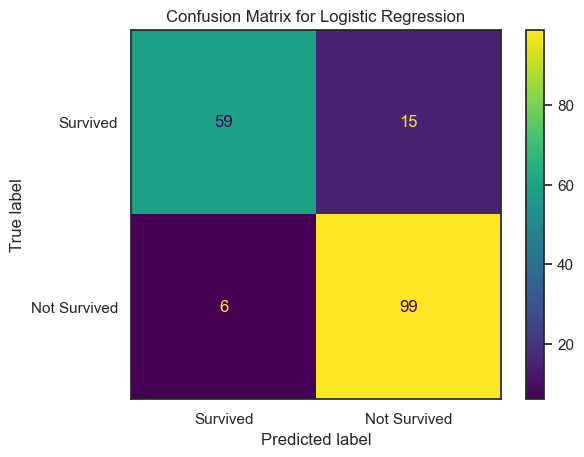

Accuracy from Decision Tree: 89.39 %
F1 score from Decision Tree: 86.33 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       105
         1.0       0.92      0.81      0.86        74

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.89      0.89       179



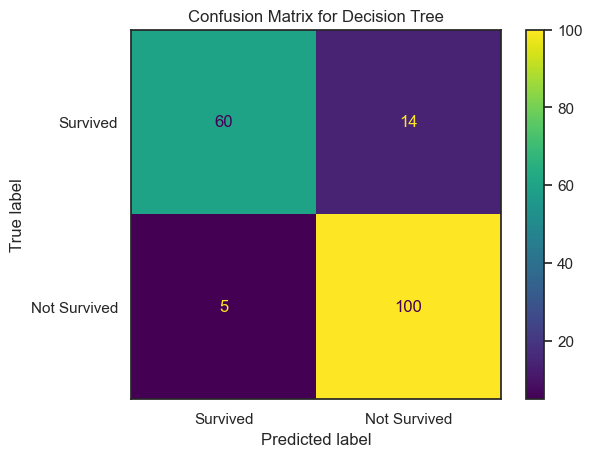

Accuracy from Random Forest: 89.39 %
F1 score from Random Forest: 86.33 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       105
         1.0       0.92      0.81      0.86        74

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.89      0.89       179



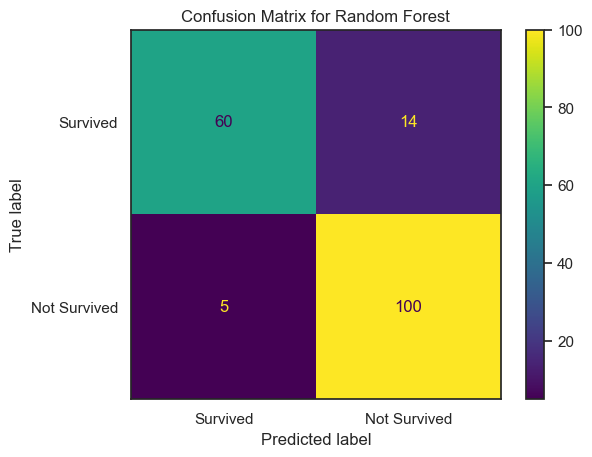

Accuracy from Support Vector Machine: 87.15 %
F1 score from Support Vector Machine: 82.96 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       105
         1.0       0.92      0.76      0.83        74

    accuracy                           0.87       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.88      0.87      0.87       179



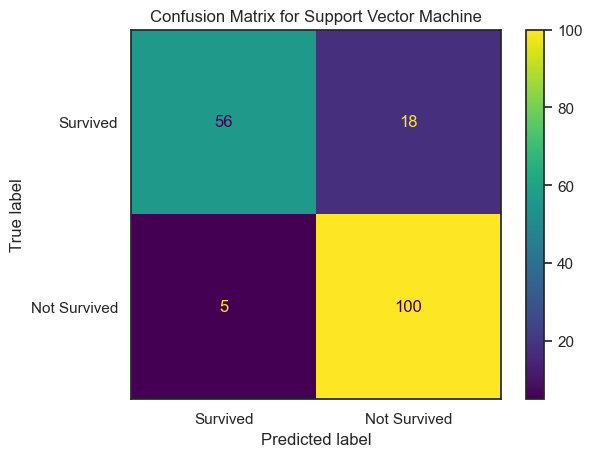

Accuracy from Gradient Boost: 89.39 %
F1 score from Gradient Boost: 86.13 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       105
         1.0       0.94      0.80      0.86        74

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.89      0.89       179



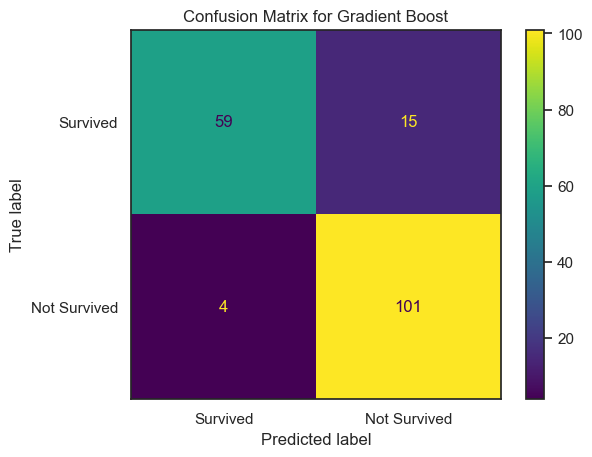

Accuracy from Adaboost: 88.27 %
F1 score from Adaboost: 84.89 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       105
         1.0       0.91      0.80      0.85        74

    accuracy                           0.88       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.88      0.88      0.88       179



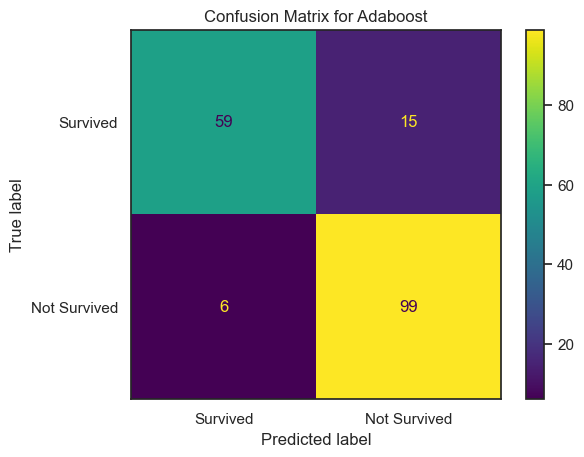

Accuracy from Xgboost: 88.83 %
F1 score from Xgboost: 86.11 %
Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       105
         1.0       0.89      0.84      0.86        74

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179



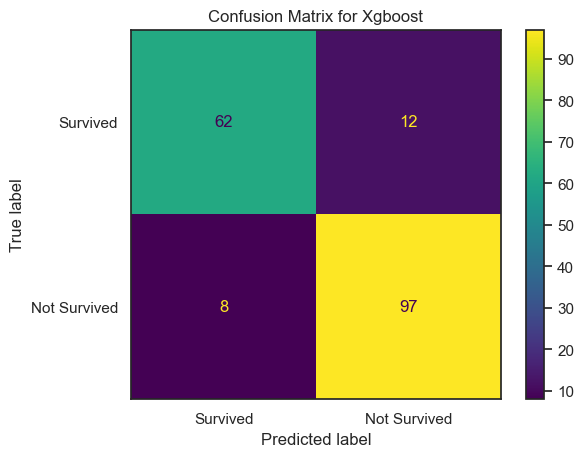

In [78]:
# not balanced 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Initialize classifiers
classifiers = {
    
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each classifier, fit, predict and evaluate
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    preds = clf.predict(X_test)
    
    # Check performance
    print(f"Accuracy from {name}: {accuracy_score(y_test, preds) * 100:.2f} %")
    print(f"F1 score from {name}: {f1_score(y_test, preds, pos_label=1) * 100:.2f} %")  # Use 1 for 'Survived'
    print("Classification report:\n", classification_report(y_test, preds))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds, labels=[1, 0])  # [1: Survived, 0: Not Survived]
    cx = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survived'])
    cx.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

                       Classifier  Accuracy
1                             SVC  0.855556
2          DecisionTreeClassifier  0.852222
3          RandomForestClassifier  0.852222
7      LinearDiscriminantAnalysis  0.848889
9              LogisticRegression  0.848889
10                  XGBClassifier  0.846667
4              AdaBoostClassifier  0.842222
5      GradientBoostingClassifier  0.838889
0            KNeighborsClassifier  0.828889
6                      GaussianNB  0.797778
8   QuadraticDiscriminantAnalysis  0.611111


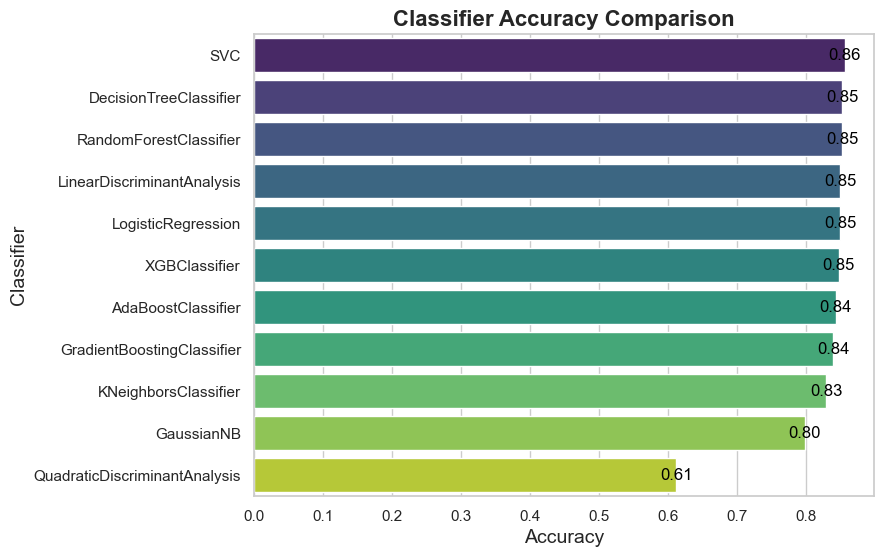

In [137]:
# cross validation 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  


# Define classifiers to evaluate
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
]

# DataFrame for logging results
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# Stratified Shuffle Split for cross-validation
# This will create stratified train-test splits to ensure class distributions are preserved
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# Dictionary to store accuracy scores
acc_dict = {}

# Cross-validation loop: evaluate each classifier using Stratified Shuffle Split
for train_index, test_index in stratified_shuffle_split.split(X, y):
    # Create training and testing sets using indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use iloc for indexing
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Use iloc for indexing

    # Iterate through each classifier
    for clf in classifiers:
        name = clf.__class__.__name__  # Get the classifier's name
        clf.fit(X_train, y_train)  # Fit the classifier on the training data
        train_predictions = clf.predict(X_test)  # Make predictions on the test data
        acc = accuracy_score(y_test, train_predictions)  # Calculate accuracy
        
        # Aggregate accuracy scores for each classifier
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

# Average accuracy calculation across all splits
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / stratified_shuffle_split.get_n_splits()  # Normalize by the number of splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)  # Create a DataFrame entry
    log = pd.concat([log, log_entry], ignore_index=True)  # Concatenate results

# Sort the log DataFrame by accuracy
log = log.sort_values(by='Accuracy', ascending=False)

# Print the accuracies of each classifier
print(log)

# Set style for clarity
sns.set(style="whitegrid")

# Set figure size and label sizes for the plot
plt.figure(figsize=(8, 6))
plt.title("Classifier Accuracy Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Classifier", fontsize=14)

# Sort log DataFrame by accuracy for ordered plotting
log_sorted = log.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Plot sorted data
sns.barplot(x="Accuracy", y="Classifier", data=log_sorted, palette="viridis")

# Add accuracy values on each bar, directly from `log_sorted`
for index, row in log_sorted.iterrows():
    plt.text(row["Accuracy"], index, f"{row['Accuracy']:.2f}", 
             color='black', ha="center", va="center")

# Show the plot
plt.show()

In [163]:
# Create an instance of the Support Vector Classifier (SVC)
candidate_classifier = SVC()

# Fit the model on the training data (X) and target labels (y)
# This trains the SVC model to learn the patterns in the data
candidate_classifier.fit(X, y)

# Make predictions on the test set (titanic_x_test) using the trained SVC model
# The predictions are then converted to integers (0 or 1) for clarity
y_test_pred = candidate_classifier.predict(titanic_x_test).astype(int)

In [165]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Prepare the submission on Kaggle 

In [167]:
# # Prepare the submission DataFrame
# submission = pd.DataFrame({
#     'PassengerId': test_data['PassengerId'],  # Include the PassengerId from the test dataset
#     'Survived': y_test_pred  # Add the predicted survival outcomes from your model
# })

# # Save the submission DataFrame to a CSV file
# # 'index=False' ensures that the DataFrame index is not included in the CSV file
# submission.to_csv('submission01.csv', index=False)

# # Print confirmation message after creating the submission file
# print("Submission file created!")

Submission file created!
